<a href="https://colab.research.google.com/github/mohzary/python-deep-learning-f19/blob/master/M2ICP7/M2ICP7_34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 2s 0us/step


In [ ]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.5369 - accuracy: 0.4406 - val_loss: 0.4576 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.4283 - accuracy: 0.4876 - val_loss: 0.4045 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.4001 - accuracy: 0.4903 - val_loss: 0.3871 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3849 - accuracy: 0.4932 - val_loss: 0.3711 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3711 - accuracy: 0.4959 - val_loss: 0.3572 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.3601 - accuracy: 0.4980 - val_loss: 0.3463 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [====================

In [ ]:
#The evaluation satge to get the final accuraccy result of our model
score,acc = autoencoder.evaluate(x_test_noisy, x_test_noisy,verbose=2)
print("Loss Score: %.2f" % (score))
print("Accuracy: %.2f%%" % (acc*100))
print(autoencoder.metrics_names)

Loss Score: 0.32
Accuracy: 0.00%
['loss', 'accuracy']


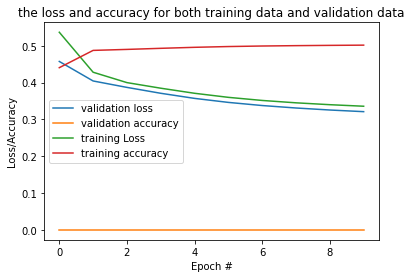

In [ ]:
import matplotlib.pyplot as plt
#To plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 10), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="validation accuracy")
plt.plot(np.arange(0, 10), history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

The input image: 


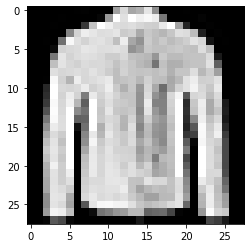

The input image with noise: 


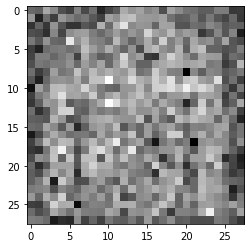

The input image: 


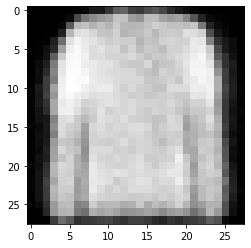

In [ ]:
encoded_imgs =  encoder.predict(x_test[[50],:])
decoded_imgs = decoder.predict(encoded_imgs)

print("The input image: ")
plt.imshow(x_test[50].reshape((28, 28)), cmap = 'gray')
plt.show()

#x_test_noisy

print("The input image with noise: ")
plt.imshow(x_test_noisy[50].reshape((28, 28)), cmap = 'gray')
plt.show()

print("The input image: ")
plt.imshow(decoded_imgs[0].reshape((28, 28)), cmap = 'gray')
plt.show()